# PHYS591000 in 2023
# Lab 06
---
## Goal 
In lab 06, we will practice:

* Dense Neural Network

and how to apply these method on a binary classification problem.


## Introduction

We will take a W/Z jets v.s Quark jets to be an example.

The W/Z jets images are labeled to `0` and quark jets images are labeled to `1`.

For Dense Neural Network, you need reshape images from (1,40,40) to (1600,).

[Keras](https://keras.io) is a friendly package for beginner. You can easily build a sequential architecture for training.

---
* **Data Desctiption:**

In the `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders, we have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `Test_1_channel`) to record the **PATH** and **label** for each image.

We have two kinds of images. One is W/Z jet image. The other is quark jet image.  
They are 1-channel images made by charged transverse momentum.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.

Each jet is clustered by anti-kt algorithm with R=0.8 and transverse momentum is greater than 200 GeV.  
The resolution for jet image is 40X40 pixels and in 1.5RX1.5R range.   
Then, we align the jet axis. 
They are also passed prerocessing: normalized and standardized.  
For further detail, you can find in references.

---
* **Is the training heathy? -- Learning curves will tell us.**

We can use learning curves to judge how healthy our model is.
Learning curves can show that our model is overfitting, underfitting or healthy.

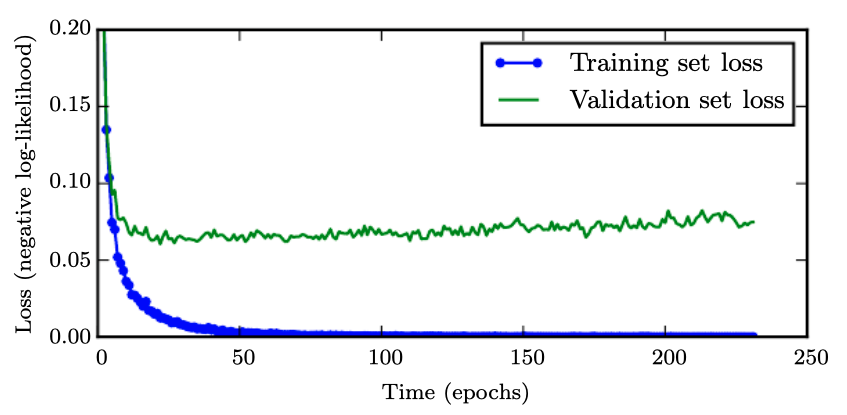


Resource: [Deep Learning: Chapter 7](https://www.deeplearningbook.org/contents/regularization.html)



---

> **Reference**   
> 1. [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)  
> 2. [Boosting H→bb¯ with Machine Learning](https://arxiv.org/abs/1807.10768)
> 3. [Jet Algorithm](https://arxiv.org/pdf/1302.0260.pdf)
> 4. [TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
> 5. [Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)
> 6. [Keras.io](https://keras.io)
> 7. [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/comments)
> 8. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)
> 9. [Learning curve](https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)



## Workflow:
 
   **i**. Loading the Training Data  
   **ii**. Visualizing jet images  
   **iii**. Building a DNN model which contains (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
           * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,)    
   **iv**. Training the DNN model (model.fit(X,Y))   
   **v**. Saving the trained model (model.save("./model.h5"))   
   **vi**. Making the learning curve figure.  
   **vii**. Loading model (load_model("./model.h5"))  
   **viii**. Applying model on Test Data and evaluating performance based on ROC and AUC   
   **ix**. Changing hyperparameters (e.g. activation function, loss function, layers, number of neuron, epoch, optimizer and regularizer) and repeat **iii** to **viii** to see which configuration is the best. 

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
from tqdm import tqdm
%config InlineBackend. figure_format = 'retina'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname in os.listdir('/kaggle/input/phys591000-2023-week06/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-2023-week06/'+ dirname):
        print(filename)
    print("\n")

# import os
# for dirname in os.listdir('/AICourse2022/ai_course_wzjet_quarkjet/'):
#     print(dirname,"/")
#     for filename in os.listdir('/AICourse2022/ai_course_wzjet_quarkjet/'+ dirname):
#         print(filename)
#     print("\n")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Test_1_channel /
Jet_Images_1
test_dict.csv


Train_1_channel /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3


Validation_1_channel /
Jet_Images_1
val_dict.csv




---

### 1.1 Load Data and Preprocessing

* We will load data and label in the  `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders.
* Please load top 10,000 data in `Train_1_channel` folder.
* Please load top 1,000 data in `Validation_1_channel` folder.
* Please load top 1,000 data in `Test_1_channel` folder.
* Please check the data shape.
* Please show how many W/Z jets/ quark jets in these three datasets.



In [2]:
##############################################################################
# Code for 1.1
##############################################################################
# Please code in this cell


"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-2023-week06/"
# path  = "/AICourse2022/ai_course_wzjet_quarkjet/"


def load_dic(file_path):

        dict_file = pd.read_csv(file_path)
        print("\n")
        print("Top 10 event infomation")
        print(dict_file.head(10))

        return dict_file

"""
Load a dictionary: "train_dict.csv" in the "Train_1_channel" folder.
"""
train_dict = load_dic(path + "/Train_1_channel/train_dict.csv")

"""
Load a dictionary: "val_dict.csv" in the "Validation_1_channel" folder.
"""
val_dict = load_dic(path + "/Validation_1_channel/val_dict.csv")

"""
Load a dictionary: "test_dict.csv" in the "Test_1_channel" folder.
"""
test_dict = load_dic(path + "/Test_1_channel/test_dict.csv")



def load_data(dict_file, N, data_folder_name):
        jet_img = []
        for i in tqdm(range(N)):
                x_jet_path = path + "/" +str(data_folder_name)+ "/" + dict_file["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                jet_img.append(x_jet_tmp)

        X = np.array(jet_img) 
        Y = dict_file["Y"][:N]
        
        time.sleep(1)

        return X, Y

"""
Load top 10,000 events in the "Train_1_channel" folder.
"x_train_jet" is our images and "target_train" is our labels.
"""
x_train_jet, target_train = load_data(train_dict, 10000, "Train_1_channel")

"""
Load top 1,000 events in the "Validation_1_channel" folder.
"x_train_jet" is our images and "target_val" is our labels.
"""

x_val_jet, target_val = load_data(val_dict, 1000, "Validation_1_channel")


"""
Load top 1,000 events in the "Test_1_channel" folder.
"x_test_jet" is our images and "target_test" is our labels.
"""

x_test_jet, target_test = load_data(test_dict, 1000, "Test_1_channel")


"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the training data set.".format(len(target_train[target_train==0])))
print("There are {} quark jets in the training data set.".format(len(target_train[target_train==1])))


print("\n")
print("There are {} W/Z jets in the validation data set.".format(len(target_val[target_val==0])))
print("There are {} quark jets in the validation data set.".format(len(target_val[target_val==1])))

print("\n")
print("There are {} W/Z jetsin the test data set.".format(len(target_test[target_test==0])))
print("There are {} quark jets in the test data set.".format(len(target_test[target_test==1])))

##############################################################################



Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  1
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  1
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  0
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  1


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  0
1   Jet_Images_1/x_val_jet_2.npz  1
2   Jet_Images_1/x_val_jet_3.npz  1
3   Jet_Images_1/x_val_jet_4.npz  0
4   Jet_Images_1/x_val_jet_5.npz  0
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  1
8   Jet_Images_1/x_val_jet_9.npz  1
9  Jet_Images_1/x_val_jet_10.npz  1


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  0
1   Jet_Images_1/x_test_jet_2.npz 

100%|██████████| 1000/1000 [00:03<00:00, 268.65it/s]




There are 4918 W/Z jets in the training data set.
There are 5082 quark jets in the training data set.


There are 503 W/Z jets in the validation data set.
There are 497 quark jets in the validation data set.


There are 512 W/Z jetsin the test data set.
There are 488 quark jets in the test data set.


---

### 1.2  
* Please draw two jet images for a W/Z jet and a quark jet, respectively.
    * You can just take images in the training dataset.
    * One figure is one jet image, so we will have two figure. 
     
[Ref: matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)  

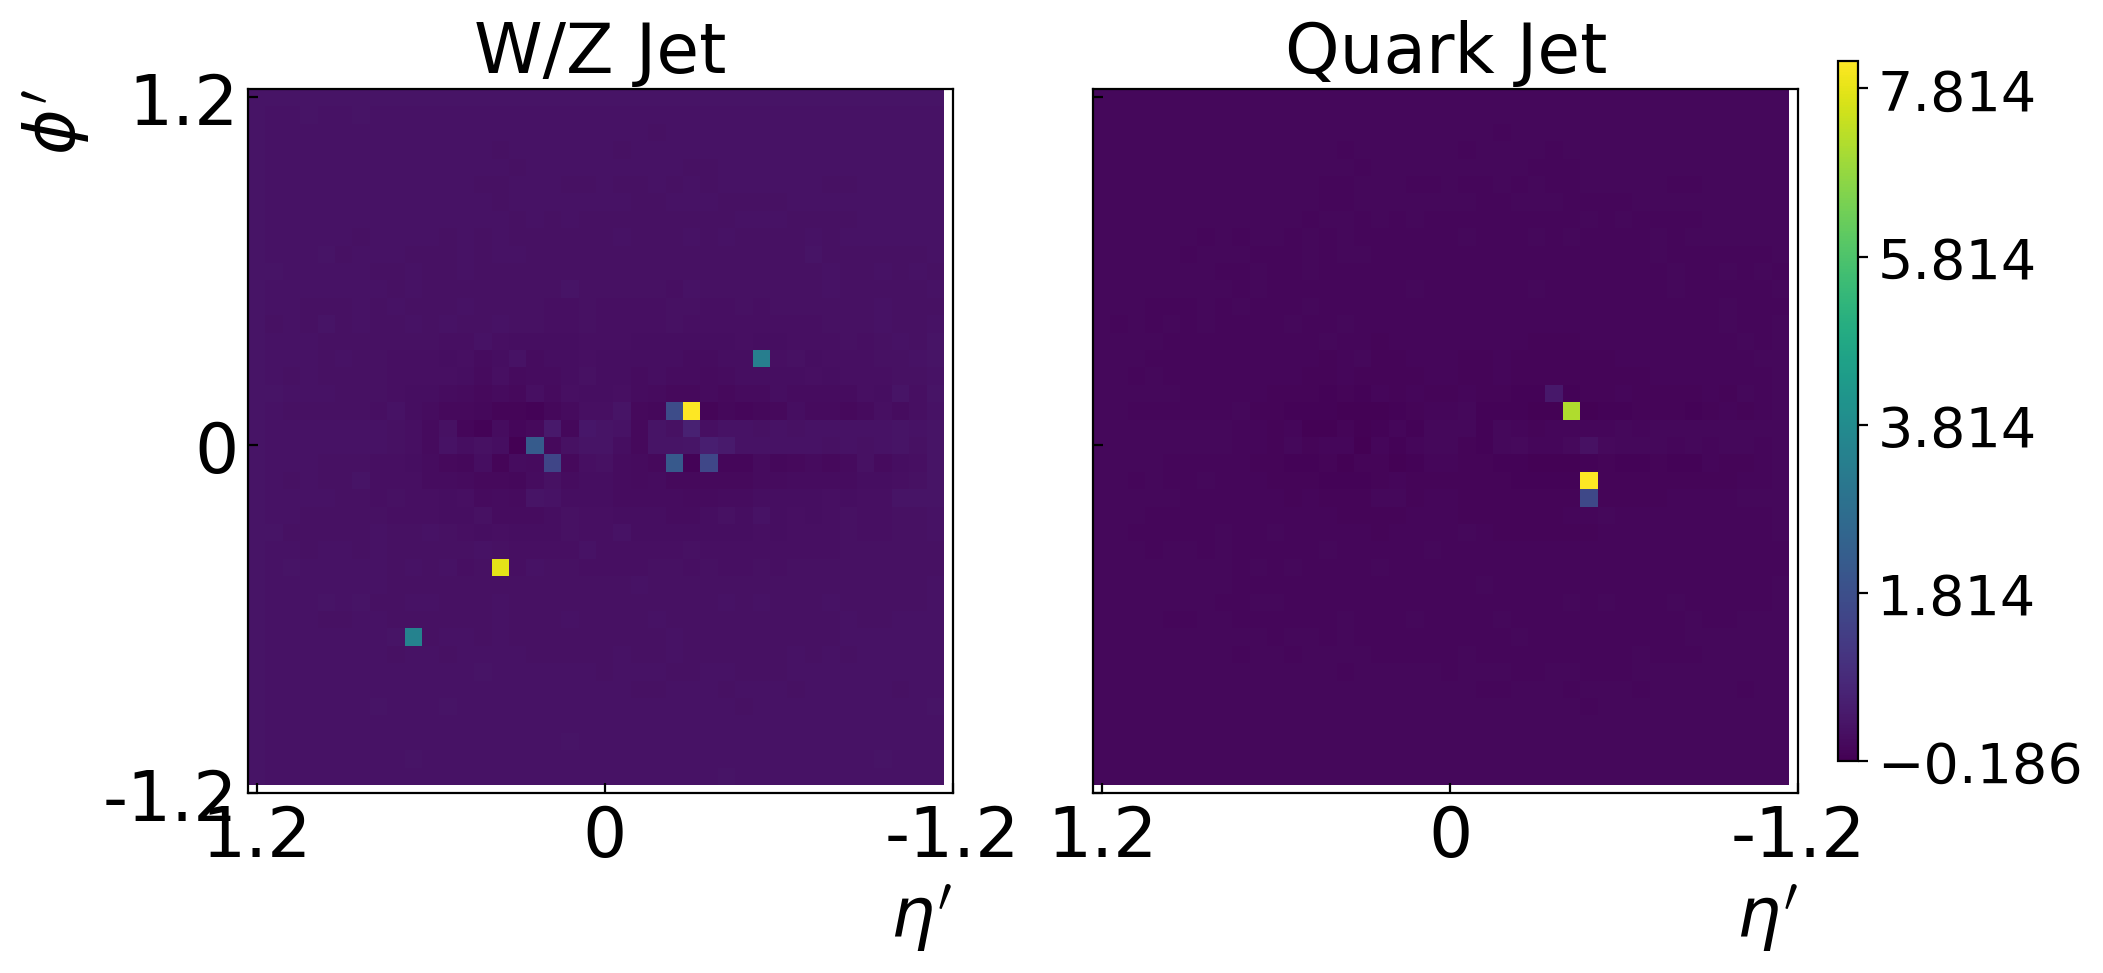

In [3]:
##############################################################################
# Code for 1.2
# 
##############################################################################
# Please code in this cell

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

WZ_jet = x_train_jet[target_train[target_train==0].index[0]][0]
quark_jet = x_train_jet[target_train[target_train==1].index[0]][0]



axes[0].imshow(WZ_jet,
               vmin=round(np.min(WZ_jet),3),
               vmax=round(np.max(WZ_jet),3),
               cmap="viridis",
               origin='upper')

axes[0].set_title("W/Z Jet", fontsize=25)

axes[0].set_yticks([0,20,40])
axes[0].set_yticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0)
axes[0].tick_params(axis='y', direction="in")
axes[0].set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)


axes[0].set_xticks([0,20,40])
axes[0].set_xticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
axes[0].set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
axes[0].tick_params(axis='x', direction="in")



im = axes[1].imshow(quark_jet,
               vmin=round(np.min(quark_jet),3),
               vmax=round(np.max(quark_jet),3),
               cmap="viridis",
               origin='upper')

axes[1].set_title("Quark Jet", fontsize=25)

axes[1].set_yticks([0,20,40])
axes[1].set_yticklabels(["","",""], fontsize=25, rotation=0)
axes[1].tick_params(axis='y', direction="in")

axes[1].set_xticks([0,20,40])
axes[1].set_xticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
axes[1].set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
axes[1].tick_params(axis='x', direction="in")

cb_ax = fig.add_axes([0.92, 0.415, 0.01, 0.175])
cbar = fig.colorbar(im, cax=cb_ax)
# #  set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(min(np.min(WZ_jet),np.min(quark_jet)), 
                         max(np.max(WZ_jet),np.max(quark_jet)), 2))
cbar.ax.tick_params(labelsize=20)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()


##############################################################################

---

### 1.3
* Please average W/Z jets and quark jets, respectively.
    * You can just take images in the training dataset.
    * the averaged jet image -> take average for N jet images.  

* Please draw averaged W/Z jet image and averaged quark jet image.
    
[Ref: numpy.average](https://numpy.org/doc/stable/reference/generated/numpy.average.html)  
[Ref: matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)  

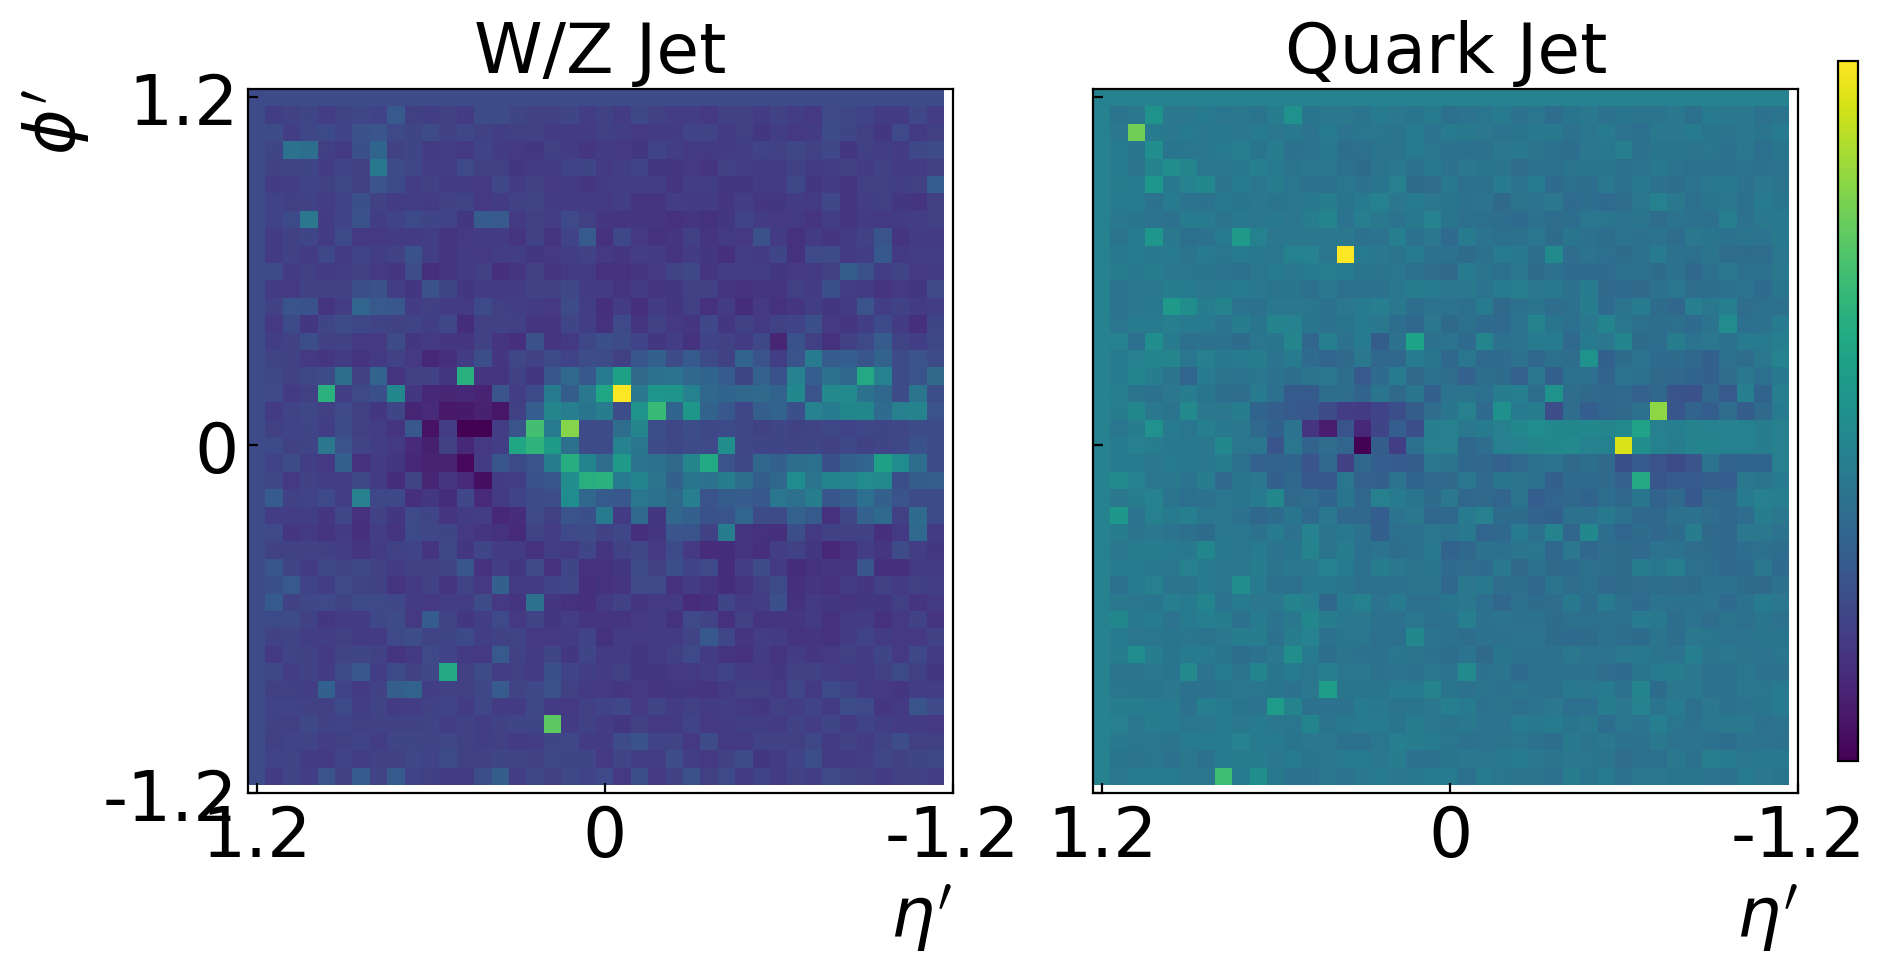

In [4]:
##############################################################################
# Code for 1.3
# 
##############################################################################
# Please code in this cell

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

WZ_jet = np.average(x_train_jet[target_train[target_train==0].index],axis=0)[0]
quark_jet = np.average(x_train_jet[target_train[target_train==1].index],axis=0)[0]



axes[0].imshow(WZ_jet,
               vmin=round(np.min(WZ_jet),3),
               vmax=round(np.max(WZ_jet),3),
               cmap="viridis",
               origin='upper')

axes[0].set_title("W/Z Jet", fontsize=25)

axes[0].set_yticks([0,20,40])
axes[0].set_yticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0)
axes[0].tick_params(axis='y', direction="in")
axes[0].set_ylabel("$\phi'$", fontsize=25, horizontalalignment='right',y=1)


axes[0].set_xticks([0,20,40])
axes[0].set_xticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
axes[0].set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
axes[0].tick_params(axis='x', direction="in")



im = axes[1].imshow(quark_jet,
               vmin=round(np.min(quark_jet),3),
               vmax=round(np.max(quark_jet),3),
               cmap="viridis",
               origin='upper')

axes[1].set_title("Quark Jet", fontsize=25)

axes[1].set_yticks([0,20,40])
axes[1].set_yticklabels(["","",""], fontsize=25, rotation=0)
axes[1].tick_params(axis='y', direction="in")

axes[1].set_xticks([0,20,40])
axes[1].set_xticklabels(["1.2","0","-1.2"], fontsize=25, rotation=0, verticalalignment='top', horizontalalignment="center")
axes[1].set_xlabel("$\eta'$", fontsize=25,horizontalalignment='right',x=1)
axes[1].tick_params(axis='x', direction="in")

cb_ax = fig.add_axes([0.92, 0.415, 0.01, 0.175])
cbar = fig.colorbar(im, cax=cb_ax)
# #  set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(min(np.min(WZ_jet),np.min(quark_jet)), 
                         max(np.max(WZ_jet),np.max(quark_jet)), 2))
cbar.ax.tick_params(labelsize=20)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()


##############################################################################


---

### 1.4
Discussion for 1.4   
* Please compare results in 1.2 and 1.3 and then describe what you found.
---
Please write your discussion in this cell:     



---

###  1.5 

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Bulid a DNN Architecture and Training

* Please create a DNN architecture with 3 hidden layers and 1 output layer.
    * There are 256 neurons in the first hidden layer, 128 neurons in the second hidden layer and 64 neurons in the third hidden layer
    * In the output layer, there is 1 neurons.
    * input_shape = (1,40,40) -> (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
    * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,) 

* **RELU** will be activation function for each hidden layer, and **sigmoid** will be the activation function for output layer.
* `Adadelta` will be the optimizer and `binary_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=50`.
    * x = x_train_jet, 
    * y = target_train,
    * validation_data= (x_val_jet, target_val)
* Please save your model and name it to be `model_DNN.h5`.

[Ref: Keras.io](https://keras.io)
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref: Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)    
[Ref: TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)      
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Sigmoid function in Wiki](https://en.wikipedia.org/wiki/Sigmoid_function)   
[Ref: Adadelta Keras api ](https://keras.io/api/optimizers/adadelta/)   
[Ref: Binary Crossentropy Keras api ](https://keras.io/api/losses/probabilistic_losses/)   
[Ref: Cross Entropy in Wiki](https://en.wikipedia.org/wiki/Cross_entropy)    


In [5]:
%%time
##############################################################################
# Code for 1.5
# 
##############################################################################
# Please code in this cell


# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate, Input
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
from sklearn.metrics import confusion_matrix
import tensorflow.keras.backend as K
from sklearn import metrics
from sklearn.utils import shuffle

print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



def DNN_model(Name):

    """
    Declare the Input Shape
    """
    input_shape = (1,40,40)

    """
    Create a Sequential Model
    """
    model = Sequential(name = Name)

    """
    Put Output from Flatten Layer into "Dense" Layer with 256 neurons
    """
    model.add(Input(shape=input_shape, name = 'input'))
    model.add(Flatten(name = 'flatten'))
    model.add(Dense(256, activation='relu', name = 'jet_dense_1'))
    model.add(Dense(128, activation='relu', name = 'jet_dense_2'))
    model.add(Dense(64, activation='relu', name = 'jet_dense_3'))

    """
    Add Output "Dense" Layer with 1 neurons into the Sequential Model
    """
    model.add(Dense(1, activation='sigmoid', name = 'jet_dense_out'))


    """
    Declare the Optimizer
    """
    model_opt = keras.optimizers.Adadelta()


    """
    Compile Model
    """
    model.compile(loss="binary_crossentropy",
                    optimizer=model_opt,
                    metrics=["accuracy","mse"])

    return model



"""
Print Architecture
"""
model = DNN_model("Sequential_for_jet")
model.summary()


"""
Model Training
"""
History_DNN = model.fit( x = x_train_jet,
                         y = target_train,
                        validation_data= (x_val_jet, target_val),
                        batch_size=512,
                        epochs=50,
                        verbose=0
                        )


"""
Save Model
"""
model.save("./model_DNN.h5")



##############################################################################

Tensorflow Version is 2.11.0
Keras Version is 2.11.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4154444340423319741
xla_global_id: -1
]
Model: "Sequential_for_jet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 jet_dense_1 (Dense)         (None, 256)               409856    
                                                                 
 jet_dense_2 (Dense)         (None, 128)               32896     
                                                                 
 jet_dense_3 (Dense)         (None, 64)                8256      
                                                                 
 jet_dense_out (Dense)       (None, 1)                 65        
                                                             

---

### 1.6

Learning Curve

* Please make a learning curve of the DNN from 1.5
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

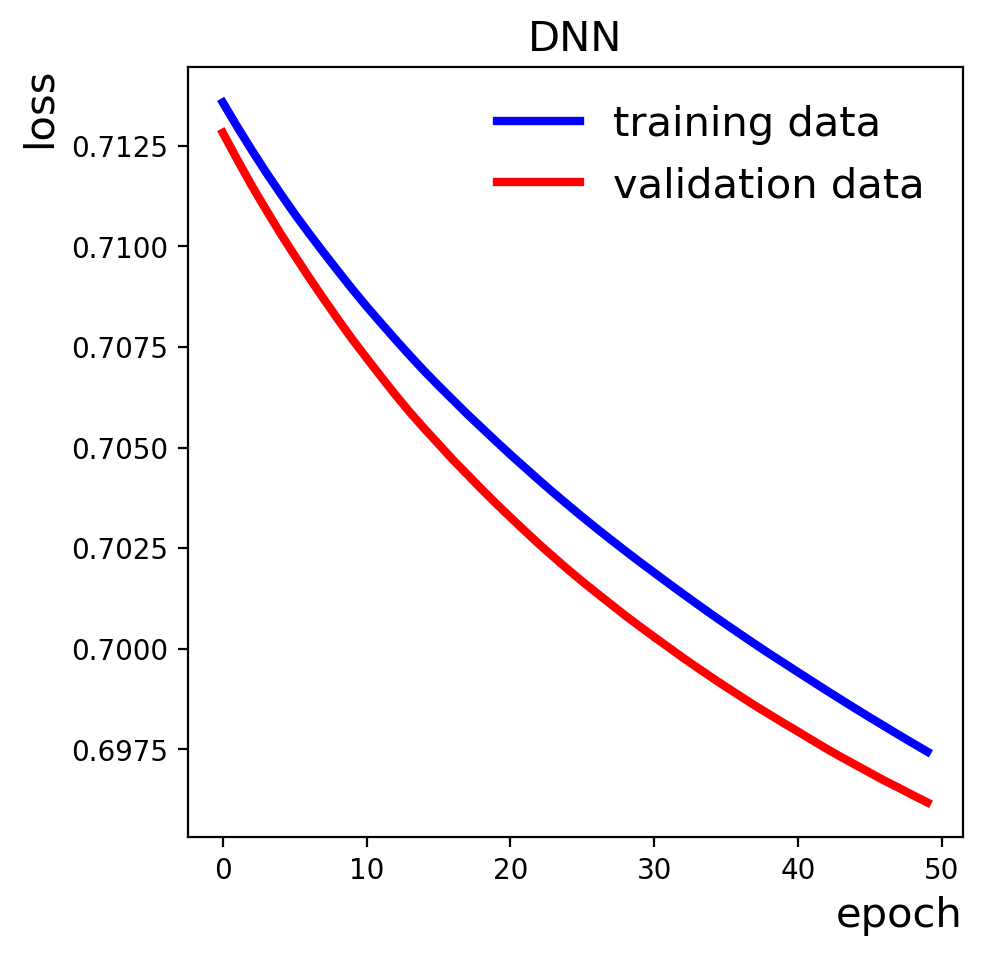

In [6]:
#############################################################################
# Code for 1.6
# 
#############################################################################
# Please code in this cell



fig, ax = plt.subplots(1,1, figsize=(5,5))

plt.plot(History_DNN.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_DNN.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("DNN", fontsize=15)

ax.set_ylabel('loss', fontsize=15,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=15,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':15}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()

#############################################################################

---

### 1.７
Study Performance
* Please load your trained model `model_DNN.h5`.
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please show the confusion matrix.

[Ref: Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize)

32/32 [==============================] - 0s 2ms/step


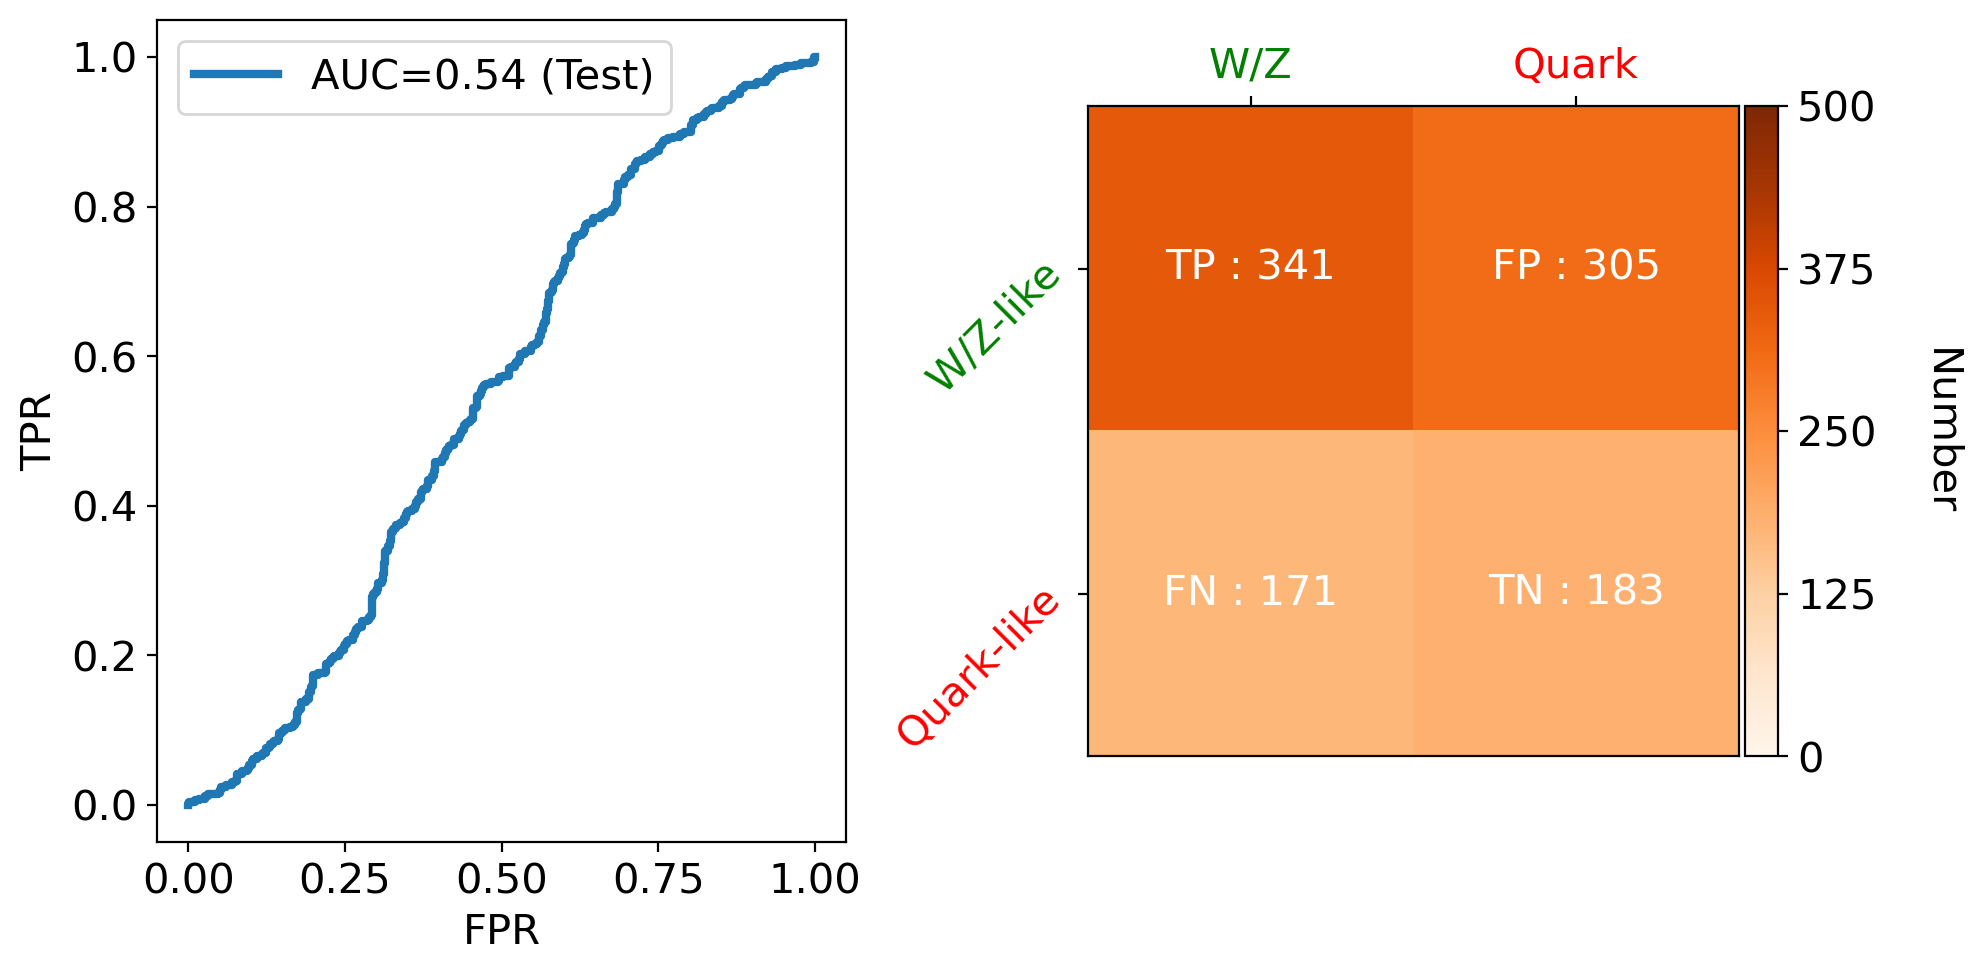

In [7]:
#############################################################################
#Code for 1.7
# 
##############################################################################
# Please code in this cell

Model_DNN = load_model("./model_DNN.h5")
prediction_jet = Model_DNN.predict(x_test_jet)

    
auc_test = metrics.roc_auc_score(target_test,prediction_jet)
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test,prediction_jet)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel("TPR",fontsize=15)
axes[0].set_xlabel("FPR",fontsize=15)
axes[0].legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),



confusion = confusion_matrix(target_test, np.where(prediction_jet > 0.5,1,0))


truelist = ["W/Z","Quark"]
likelist = ["W/Z-like","Quark-like"]

s = len(truelist)
# f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = axes[1].imshow(confusion.T, cmap="Oranges", origin= "upper", vmin=0, vmax=500)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=15)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Number", rotation=270, fontsize=15, labelpad=30, y=0.5)
cbar.set_ticks([0,125,250,375,500])
cbar.ax.set_yticklabels(["0","125","250","375","500"])

axes[1].set_xticks(range((confusion.T).shape[1]))
axes[1].set_xticklabels(truelist, fontsize=15, rotation=0)
axes[1].set_yticks(range((confusion.T).shape[1]))
axes[1].set_yticklabels(likelist, fontsize=15, rotation=45)

my_colors = ["green","red"]
axes[1].xaxis.tick_top()
for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(axes[1].get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TP","FP"],["FN","TN"]])
    
for (i, j), z in np.ndenumerate(confusion.T):
    axes[1].text(j, i, '{:^3s}: {:0.0f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=15,color="white")


plt.tight_layout()
plt.show()

##############################################################################


---

###  1.8


Now, let's try a larger epochs.
* Please repeat cell **1.5**, but let `epochs=500`
* Please save your model and name it to be `model_DNN_epoch_500.h5`.

In [8]:
%%time
##############################################################################
# Code for 1.8
# 
##############################################################################
# Please code in this cell

def DNN_model(Name):

    """
    Declare the Input Shape
    """
    input_shape = (1,40,40)

    """
    Create a Sequential Model
    """
    model = Sequential(name = Name)

    """
    Put Output from Flatten Layer into "Dense" Layer with 256 neurons
    """
    model.add(Input(shape=input_shape, name = 'input'))
    model.add(Flatten(name = 'flatten'))
    model.add(Dense(256, activation='relu', name = 'jet_dense_1'))
    model.add(Dense(128, activation='relu', name = 'jet_dense_2'))
    model.add(Dense(64, activation='relu', name = 'jet_dense_3'))

    """
    Add Output "Dense" Layer with 1 neurons into the Sequential Model
    """
    model.add(Dense(1, activation='sigmoid', name = 'jet_dense_out'))


    """
    Declare the Optimizer
    """
    model_opt = keras.optimizers.Adadelta()


    """
    Compile Model
    """
    model.compile(loss="binary_crossentropy",
                    optimizer=model_opt,
                    metrics=["accuracy","mse"])

    return model



"""
Print Architecture
"""
model = DNN_model("Sequential_for_jet")
model.summary()


"""
Model Training
"""
History_DNN = model.fit( x = x_train_jet,
                         y = target_train,
                        validation_data= (x_val_jet, target_val),
                        batch_size=512,
                        epochs=500,
                        verbose=0
                        )


"""
Save Model
"""
model.save("./model_DNN_epoch_500.h5")

##############################################################################

Model: "Sequential_for_jet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 jet_dense_1 (Dense)         (None, 256)               409856    
                                                                 
 jet_dense_2 (Dense)         (None, 128)               32896     
                                                                 
 jet_dense_3 (Dense)         (None, 64)                8256      
                                                                 
 jet_dense_out (Dense)       (None, 1)                 65        
                                                                 
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
CPU times: user 7min 38s, sys: 14 s, total

---

### 1.9

Learning Curve and Performance of the DNN   

Learning Curve: 

* Please make a learning curve of the DNN from 1.8
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

Study Performance:  
   
* Please load your trained model `model_DNN_epoch_500.h5`.
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please show the confusion matrix.


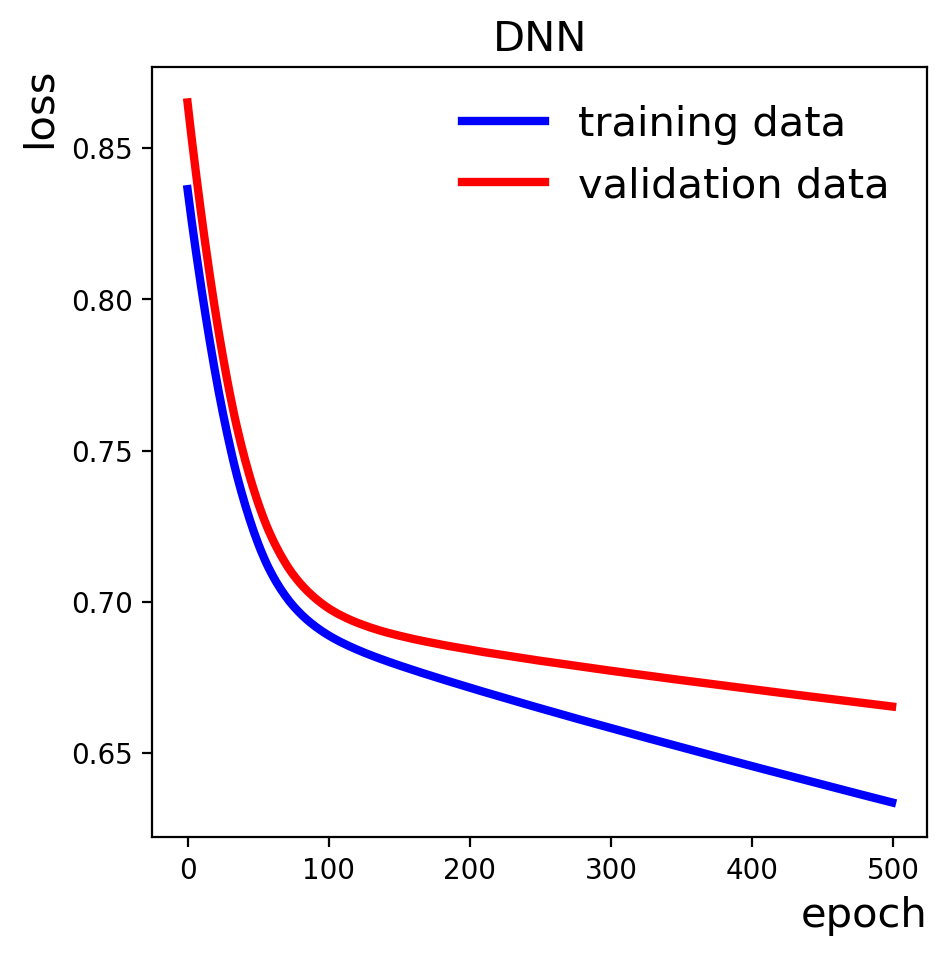

32/32 [==============================] - 0s 2ms/step


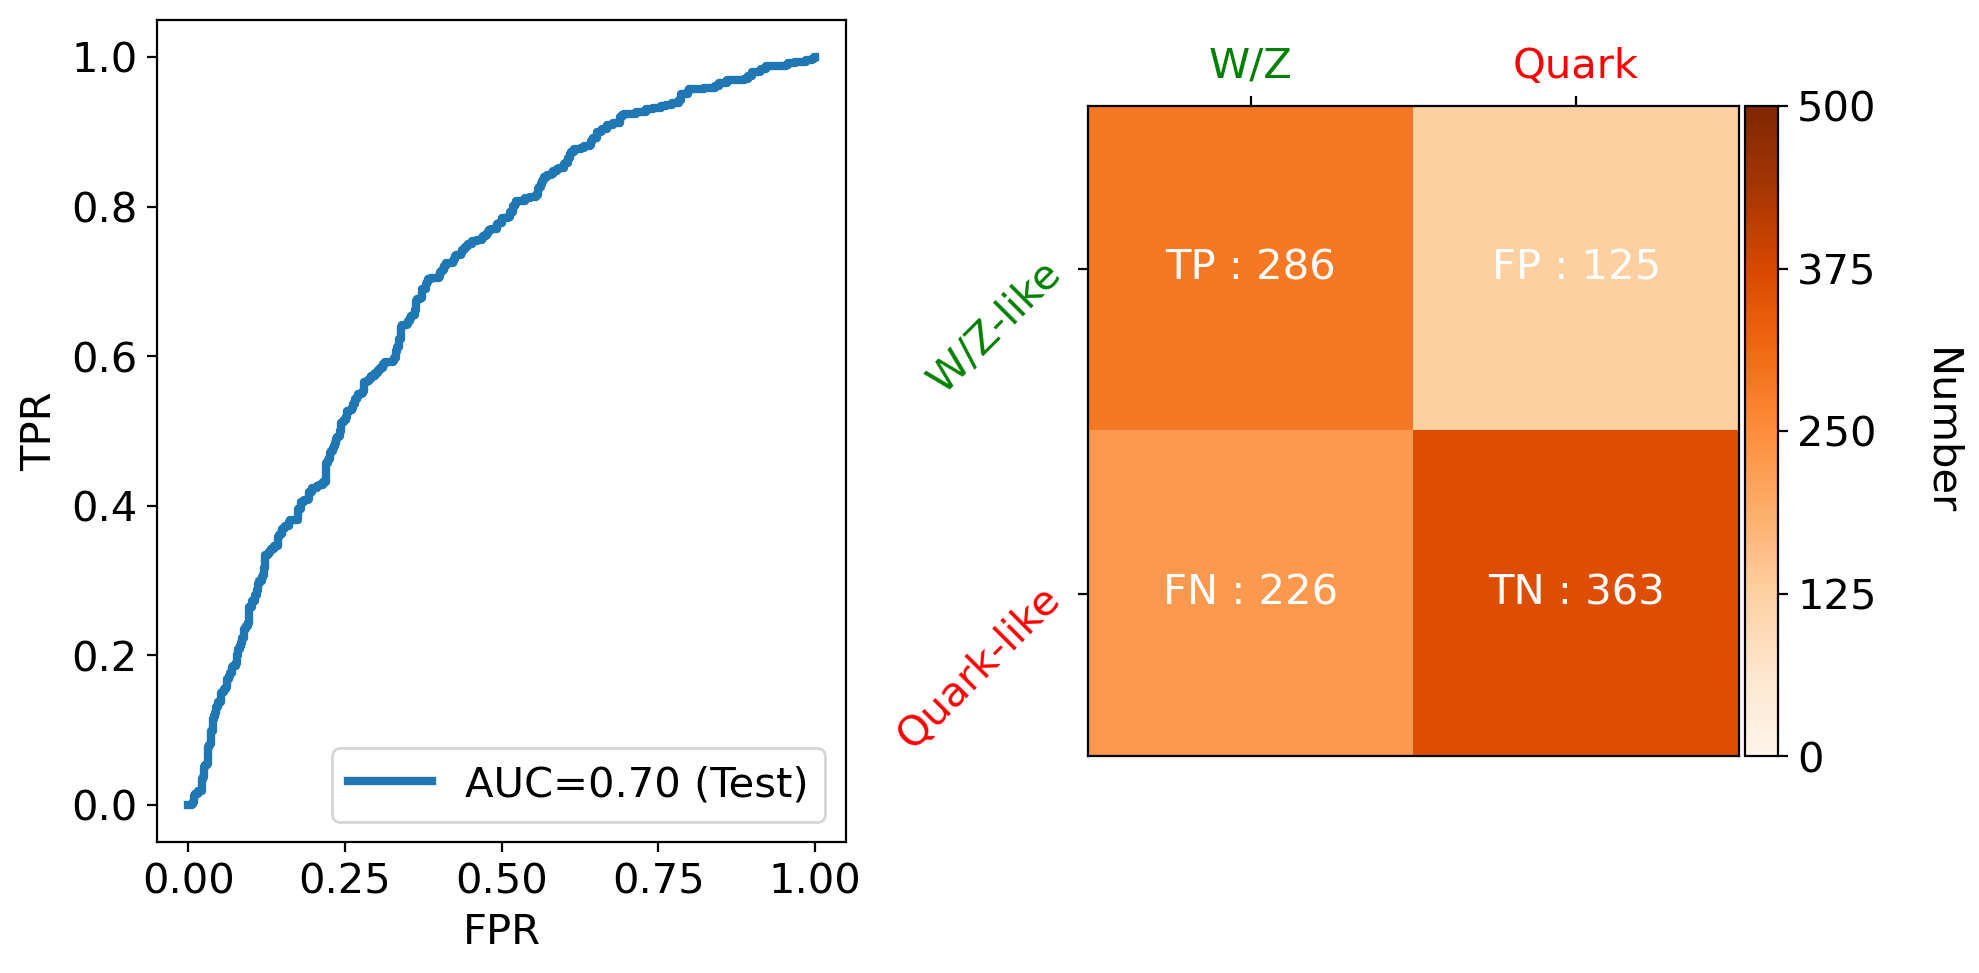

In [9]:
#############################################################################
#Code for 1.9
# 
##############################################################################
# Please code in this cell


"""
Learning Curve
"""
fig, ax = plt.subplots(1,1, figsize=(5,5))

plt.plot(History_DNN.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_DNN.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("DNN", fontsize=15)

ax.set_ylabel('loss', fontsize=15,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=15,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':15}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()


"""
ROC Curve and Confusion Matrix
"""

Model_DNN = load_model("./model_DNN_epoch_500.h5")
prediction_jet = Model_DNN.predict(x_test_jet)

    
auc_test = metrics.roc_auc_score(target_test,prediction_jet)
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test,prediction_jet)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel("TPR",fontsize=15)
axes[0].set_xlabel("FPR",fontsize=15)
axes[0].legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),



confusion = confusion_matrix(target_test, np.where(prediction_jet > 0.5,1,0))


truelist = ["W/Z","Quark"]
likelist = ["W/Z-like","Quark-like"]

s = len(truelist)
# f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = axes[1].imshow(confusion.T, cmap="Oranges", origin= "upper", vmin=0, vmax=500)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=15)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Number", rotation=270, fontsize=15, labelpad=30, y=0.5)
cbar.set_ticks([0,125,250,375,500])
cbar.ax.set_yticklabels(["0","125","250","375","500"])

axes[1].set_xticks(range((confusion.T).shape[1]))
axes[1].set_xticklabels(truelist, fontsize=15, rotation=0)
axes[1].set_yticks(range((confusion.T).shape[1]))
axes[1].set_yticklabels(likelist, fontsize=15, rotation=45)

my_colors = ["green","red"]
axes[1].xaxis.tick_top()
for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(axes[1].get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TP","FP"],["FN","TN"]])
    
for (i, j), z in np.ndenumerate(confusion.T):
    axes[1].text(j, i, '{:^3s}: {:0.0f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=15,color="white")


plt.tight_layout()
plt.show()

##############################################################################

---

### 1.10
Discussion for 1.10
* Please compare results in 1.6, 1.7 and 1.9.
---
Please write your discussion in this cell:     



---

### 1.11 Hyperparameters Tunning by Hand

We believe that you don't satisfy results above.  
It's time to do **Hyperparameters Tunning**
* Please change any hyperparameters as possible as you can (e.g. activation function, loss function, layers, number of neuron, epoch, optimizer and regularizer) to get the best performance.
* Please show the learning curve to prove you have a well training
* Please use AUC, ROC curve and confusion matrix to show your perfomnace


In [10]:
#############################################################################
#Code for 1.11
# 
##############################################################################
# Please code in this cell


##############################################################################

# Bonus - Load Large Data for Training
---
#### In cells above, we only load 10,000 events for training. However, the data statistics is too low. If we want to let our model become more healthy, we should use more data for training. But the memory is limited, we can not load huge data into RAM. To conquer this difficulty, generator method is one of solutions for this issue. 

* Please read reference to understand how to define generator.
* Please load data and labels in the `Train_1_channel` folder, in the `Validation_1_channel` folder and in `Test_1_channel` folder.
* Please load top 100,000 data in `Train_1_channel` folder using generator method. 
* Please load top 10,000 data in `Validation_1_channel` using generator method. 
* Please load top 10,000 data in `Test_1_channel` using generator method. 
* Pleas use the same DNN model as cell **1.5** to train the DNN model.

Learning Curve
* Please make a learning curve of the DNN from Bonus part.
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please make a figure for confusion matrix.


Hint: [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/notebook)

Hint. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)



In [11]:
%%time 
#############################################################################
# Code for Bonus
# 
#############################################################################
# Please code in this cell


"""
Define generator()
"""

nb_train_samples = 100000
nb_val_samples = 10000
nb_test_samples = 10000

batch_size = 512

def train_generator():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x_batch = []
            y_batch = []

            end = min(start + batch_size, nb_train_samples)
            for img_path in range(start, end):
                
                x_train_jet_path = path + "/Train_1_channel/" + train_dict["Jet_Images"][img_path]
                x_train_jet = np.load(x_train_jet_path)["jet_images"]
                x_batch.append(x_train_jet)
        
                
                if train_dict["Y"][img_path] == 0:
                    y_batch.append(["0"])
                if train_dict["Y"][img_path] == 1:
                     y_batch.append(["1"])

            yield (np.array(x_batch), to_categorical(np.array(y_batch)))
            
def val_generator():
    while True:
        for start in range(0, nb_val_samples, batch_size):
            x_batch = []
            y_batch = []

#             print(start)
            end = min(start + batch_size, nb_val_samples)
            for img_path in range(start, end):
                
                x_val_jet_path = path + "/Validation_1_channel/" + val_dict["Jet_Images"][img_path]
                x_val_jet = np.load(x_val_jet_path)["jet_images"]
                x_batch.append(x_val_jet)
        
                
                if val_dict["Y"][img_path] == 0:
                    y_batch.append(["0"])
                if val_dict["Y"][img_path] == 1:
                     y_batch.append(["1"])

            yield (np.array(x_batch), to_categorical(np.array(y_batch)))
            
            
def test_generator():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x_batch = []
            y_batch = []

#             print(start)
            end = min(start + batch_size, nb_test_samples)
            for img_path in range(start, end):
                
                x_test_jet_path = path + "/Test_1_channel/" + test_dict["Jet_Images"][img_path]
                x_test_jet = np.load(x_test_jet_path)["jet_images"]
                x_batch.append(x_test_jet)
        
                
                if test_dict["Y"][img_path] == 0:
                    y_batch.append(["0"])
                if test_dict["Y"][img_path] == 1:
                     y_batch.append(["1"])

            yield (np.array(x_batch), to_categorical(np.array(y_batch)))
            
            
            
"""
Declare the Input Shape
"""
input_shape = (1, 40,40)


"""
Create a Sequential Model
"""
model_DNN_Large_Statistics = DNN_model('Model_DNN_Large_Statistics')

"""
Print Architecture
"""
model_DNN_Large_Statistics.summary()


"""
Model Training
"""
History_Large_Statistics = model_DNN_Large_Statistics.fit(
            train_generator(),
            epochs= 10,
            steps_per_epoch= nb_train_samples // batch_size,
            validation_data= val_generator(),
            validation_steps = nb_val_samples // batch_size,
            verbose=1
)


"""
Save Model
"""
model_DNN_Large_Statistics.save("./model_Large_Statistics.h5")

             
#############################################################################

Model: "Model_DNN_Large_Statistics"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 jet_dense_1 (Dense)         (None, 256)               409856    
                                                                 
 jet_dense_2 (Dense)         (None, 128)               32896     
                                                                 
 jet_dense_3 (Dense)         (None, 64)                8256      
                                                                 
 jet_dense_out (Dense)       (None, 1)                 65        
                                                                 
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
195/195 [==============

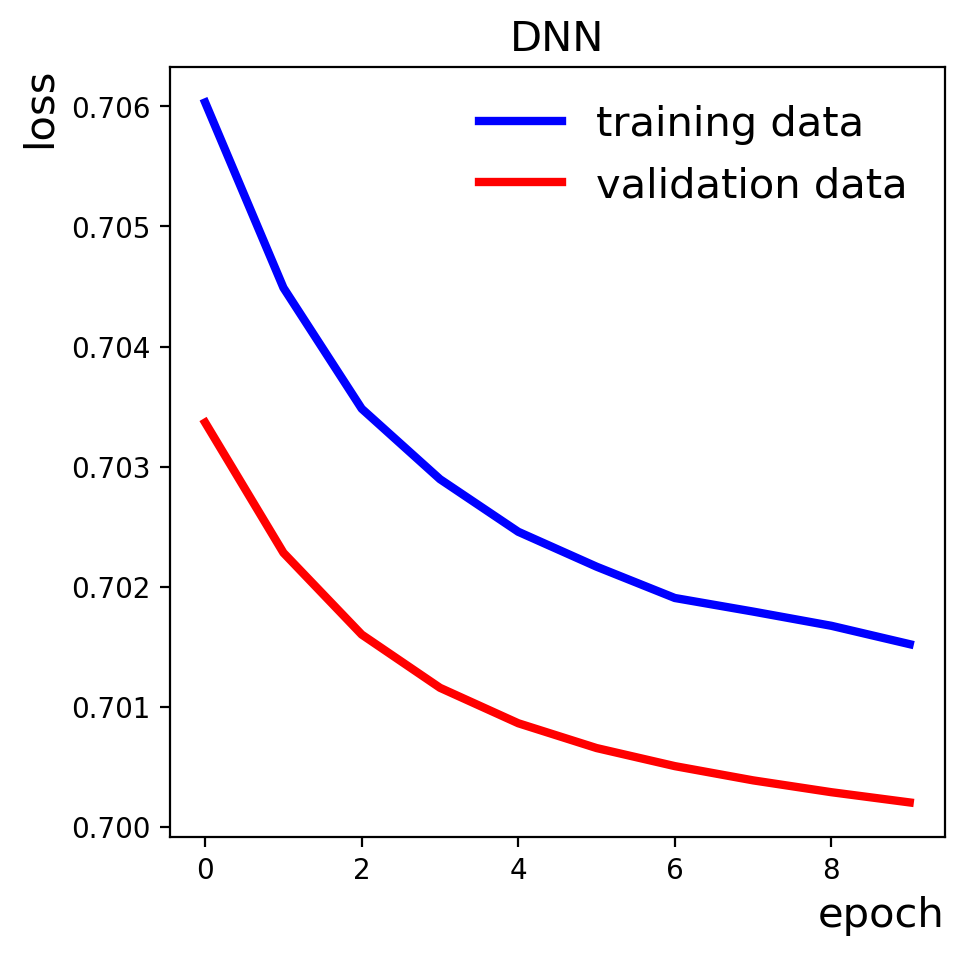

100%|██████████| 10000/10000 [00:39<00:00, 253.51it/s]


313/313 [==============================] - 1s 2ms/step


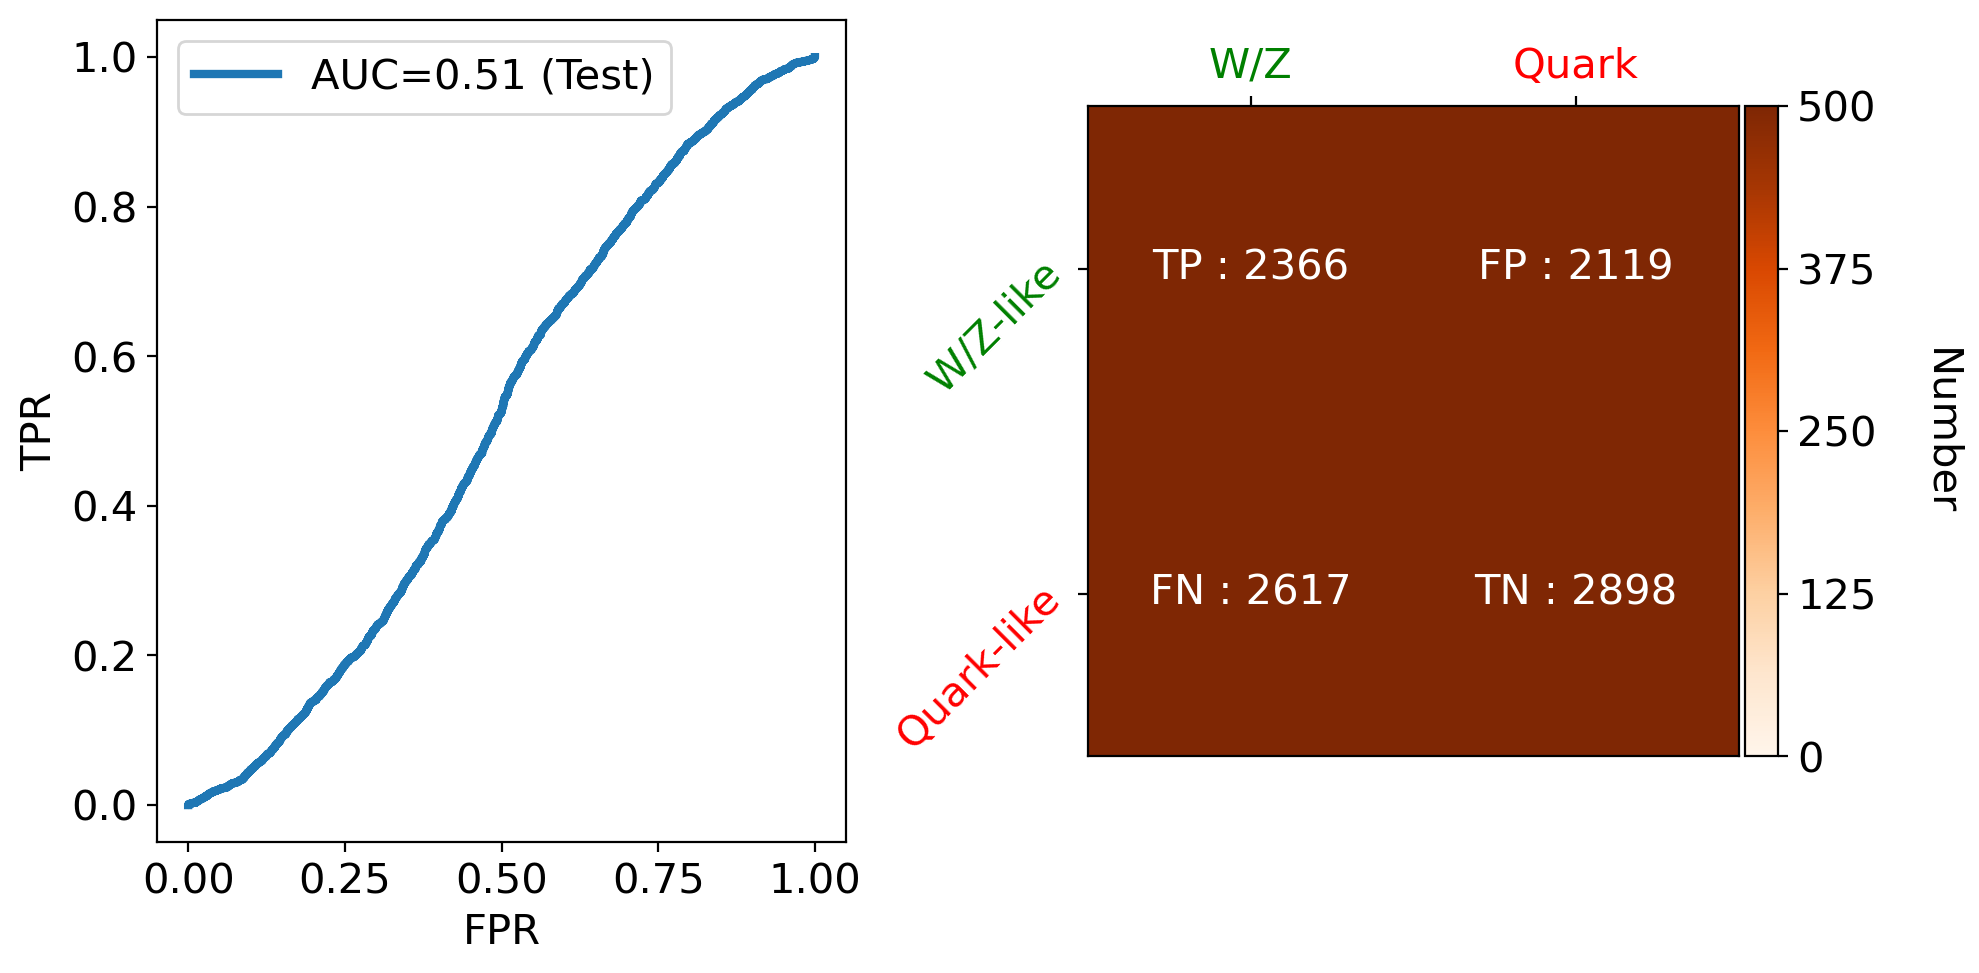

In [12]:
#############################################################################
# Code for Bonus
# Learning Curve
# ROC Curve and Confusion Matrix
#############################################################################
# Please code in this cell


"""
Learning Curve
"""
fig, ax = plt.subplots(1,1, figsize=(5,5))

plt.plot(History_Large_Statistics.history["loss"], label='training data',c='blue',linewidth = 3)
plt.plot(History_Large_Statistics.history["val_loss"], label='validation data',c='red',linewidth = 3)

plt.title("DNN", fontsize=15)

ax.set_ylabel('loss', fontsize=15,horizontalalignment='right',y=1)
ax.set_xlabel('epoch', fontsize=15,horizontalalignment='right',x=1)
plt.legend(loc='best', prop={'size':15}, edgecolor = "w",fancybox=False, framealpha=0)


plt.show()


"""
ROC Curve and Confusion Matrix
"""

Model_DNN = load_model("./model_Large_Statistics.h5")


x_test_jet, target_test = load_data(test_dict, 10000, "Test_1_channel")
prediction_jet = Model_DNN.predict(x_test_jet)
# prediction_jet = Model_Large_Statistics.predict(test_generator())

    
auc_test = metrics.roc_auc_score(target_test,prediction_jet)
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(target_test,prediction_jet)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(auc_test))

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel("TPR",fontsize=15)
axes[0].set_xlabel("FPR",fontsize=15)
axes[0].legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),



confusion = confusion_matrix(target_test, np.where(prediction_jet > 0.5,1,0))


truelist = ["W/Z","Quark"]
likelist = ["W/Z-like","Quark-like"]

s = len(truelist)
# f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = axes[1].imshow(confusion.T, cmap="Oranges", origin= "upper", vmin=0, vmax=500)

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=15)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Number", rotation=270, fontsize=15, labelpad=30, y=0.5)
cbar.set_ticks([0,125,250,375,500])
cbar.ax.set_yticklabels(["0","125","250","375","500"])

axes[1].set_xticks(range((confusion.T).shape[1]))
axes[1].set_xticklabels(truelist, fontsize=15, rotation=0)
axes[1].set_yticks(range((confusion.T).shape[1]))
axes[1].set_yticklabels(likelist, fontsize=15, rotation=45)

my_colors = ["green","red"]
axes[1].xaxis.tick_top()
for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(axes[1].get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TP","FP"],["FN","TN"]])
    
for (i, j), z in np.ndenumerate(confusion.T):
    axes[1].text(j, i, '{:^3s}: {:0.0f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=15,color="white")


plt.tight_layout()
plt.show()

#############################################################################
